# Load Parquet

In [1]:
import pandas as pd

pd.set_option('display.float_format', '{:,.4f}'.format)

df = pd.read_parquet('job-bias-synthetic-human-benchmark.parquet')
print(f"Column Names: {df.columns.values}")
print(f"Columns: {len(df.columns)}")
print(f"Rows: {len(df)}")

Column Names: ['id' 'document_id' 'verified' 'synthetic' 'source' 'country' 'company'
 'position' 'label_age' 'label_disability' 'label_feminine'
 'label_masculine' 'label_racial' 'label_sexuality' 'label_general'
 'analysis_age' 'analysis_disability' 'analysis_feminine'
 'analysis_masculine' 'analysis_racial' 'analysis_sexuality'
 'analysis_general' 'text' 'notes' 'original']
Columns: 25
Rows: 7540


In [2]:
label_columns = [col for col in df.columns if col.startswith('label_')]
analysis_columns = [col for col in df.columns if col.startswith('analysis_')]
categories = [col.replace('label_', '') for col in label_columns]
text_column = 'text'

print(f"Categories: {categories}")
print(f"Labels: {label_columns}")
print(f"Analysis: {analysis_columns}")
print(f"Input: {text_column}")

Categories: ['age', 'disability', 'feminine', 'masculine', 'racial', 'sexuality', 'general']
Labels: ['label_age', 'label_disability', 'label_feminine', 'label_masculine', 'label_racial', 'label_sexuality', 'label_general']
Analysis: ['analysis_age', 'analysis_disability', 'analysis_feminine', 'analysis_masculine', 'analysis_racial', 'analysis_sexuality', 'analysis_general']
Input: text


In [3]:
# Preview dataframe
df.head(3)

,id,document_id,verified,synthetic,source,country,company,position,label_age,label_disability,...,analysis_age,analysis_disability,analysis_feminine,analysis_masculine,analysis_racial,analysis_sexuality,analysis_general,text,notes,original
0,Kaggle::techmap::5f771da36d0cd168d7d3e8c5::ind...,Kaggle::techmap::5f771da36d0cd168d7d3e8c5::ind...,True,False,indeed_ie,IE,MYM Recruitment,"Practice Manager, Job Ref. JO",False,False,...,None,None,None,None,None,None,None,"Practice Manager,. Job Ref. JO3715. Co. Roscom...",None,"<p><b>Practice Manager, </b><br><b>Job Ref. JO..."
1,Kaggle::techmap::5f7c0f10b35f4b58e69dd69a::ind...,Kaggle::techmap::5f7c0f10b35f4b58e69dd69a::ind...,True,False,indeed_ie,IE,Gifts Direct and The Irish Store,Customer Service Agent,True,False,...,"The emphasis on experience in a ""fast paced en...",None,None,None,None,None,None,SEASONAL. 3 MONTHS - IMMEDIATE START - PARTIAL...,None,<p>SEASONAL - 3 MONTHS - IMMEDIATE START - PAR...
2,Kaggle::techmap::5f818d70ebf38561debdcf22::ind...,Kaggle::techmap::5f818d70ebf38561debdcf22::ind...,True,False,indeed_ie,IE,St. James's Hospital,Staff Nurse Mental Health,False,False,...,None,None,None,None,None,None,None,You may be required to. work overtime on an e...,None,<p></p>\n<div>\n <div>\n <div>\n <p><b>Role...


In [4]:
# Preview job description text

df.loc[0, 'text']

'Practice Manager,. Job Ref. JO3715. Co. Roscommon/Co. Leitrim,. Perm role, Full-time hours. Salary DOE. MYM are now working with a reputable company situated in County Roscommon and County Leitrim. Due to demand and being the only service of its kind in both Counties it is now recruiting a Practice Manager, to add to the qualified and experienced staff who collectively have over 75 years’ experience. Role profile: Practice Manger required for long-established and progressive optician/audiology practices in Roscommon Town and Carrick-on-Shannon (35min apart through beautiful countryside and no traffic! ). You will work between both locations. The successful candidate will work alongside the owner and the experienced team to deliver product and service quality and to develop the business. The position is suitable for an ambitious, self-motivated, focused, and driven candidate with a passion for customer service and business development. Previous experience in these fields (of optics and

# Synthetic vs Real vs Verified

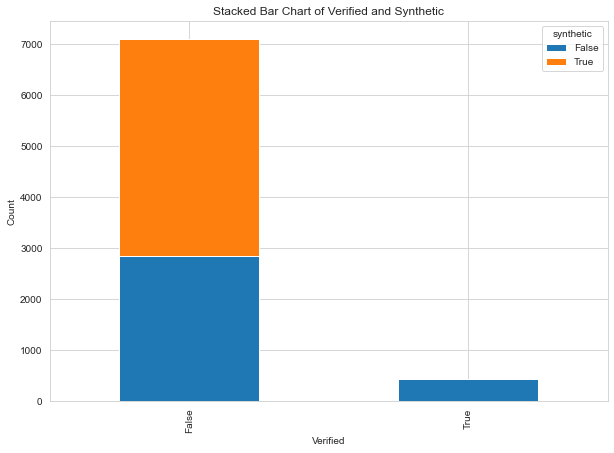

In [30]:
import matplotlib.pyplot as plt

counts = df.groupby(['verified', 'synthetic']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Stacked Bar Chart of Verified and Synthetic')
plt.xlabel('Verified')
plt.ylabel('Count')
plt.show()

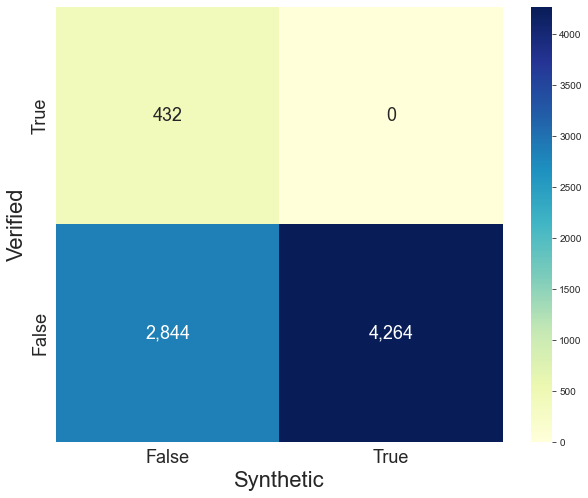

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cross_tab = pd.crosstab(df['verified'], df['synthetic'])


def custom_format(x):
    return '{:,}'.format(x)


cross_tab_fmt = cross_tab.map(lambda x: "{:,}".format(x))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cross_tab, annot=cross_tab_fmt, fmt='', cmap="YlGnBu", ax=ax,
            annot_kws={"size": 18})

ax.invert_yaxis()
#ax.invert_xaxis()    
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('Synthetic', fontsize=22)
ax.set_ylabel('Verified', fontsize=22)

plt.show()


plt.show()

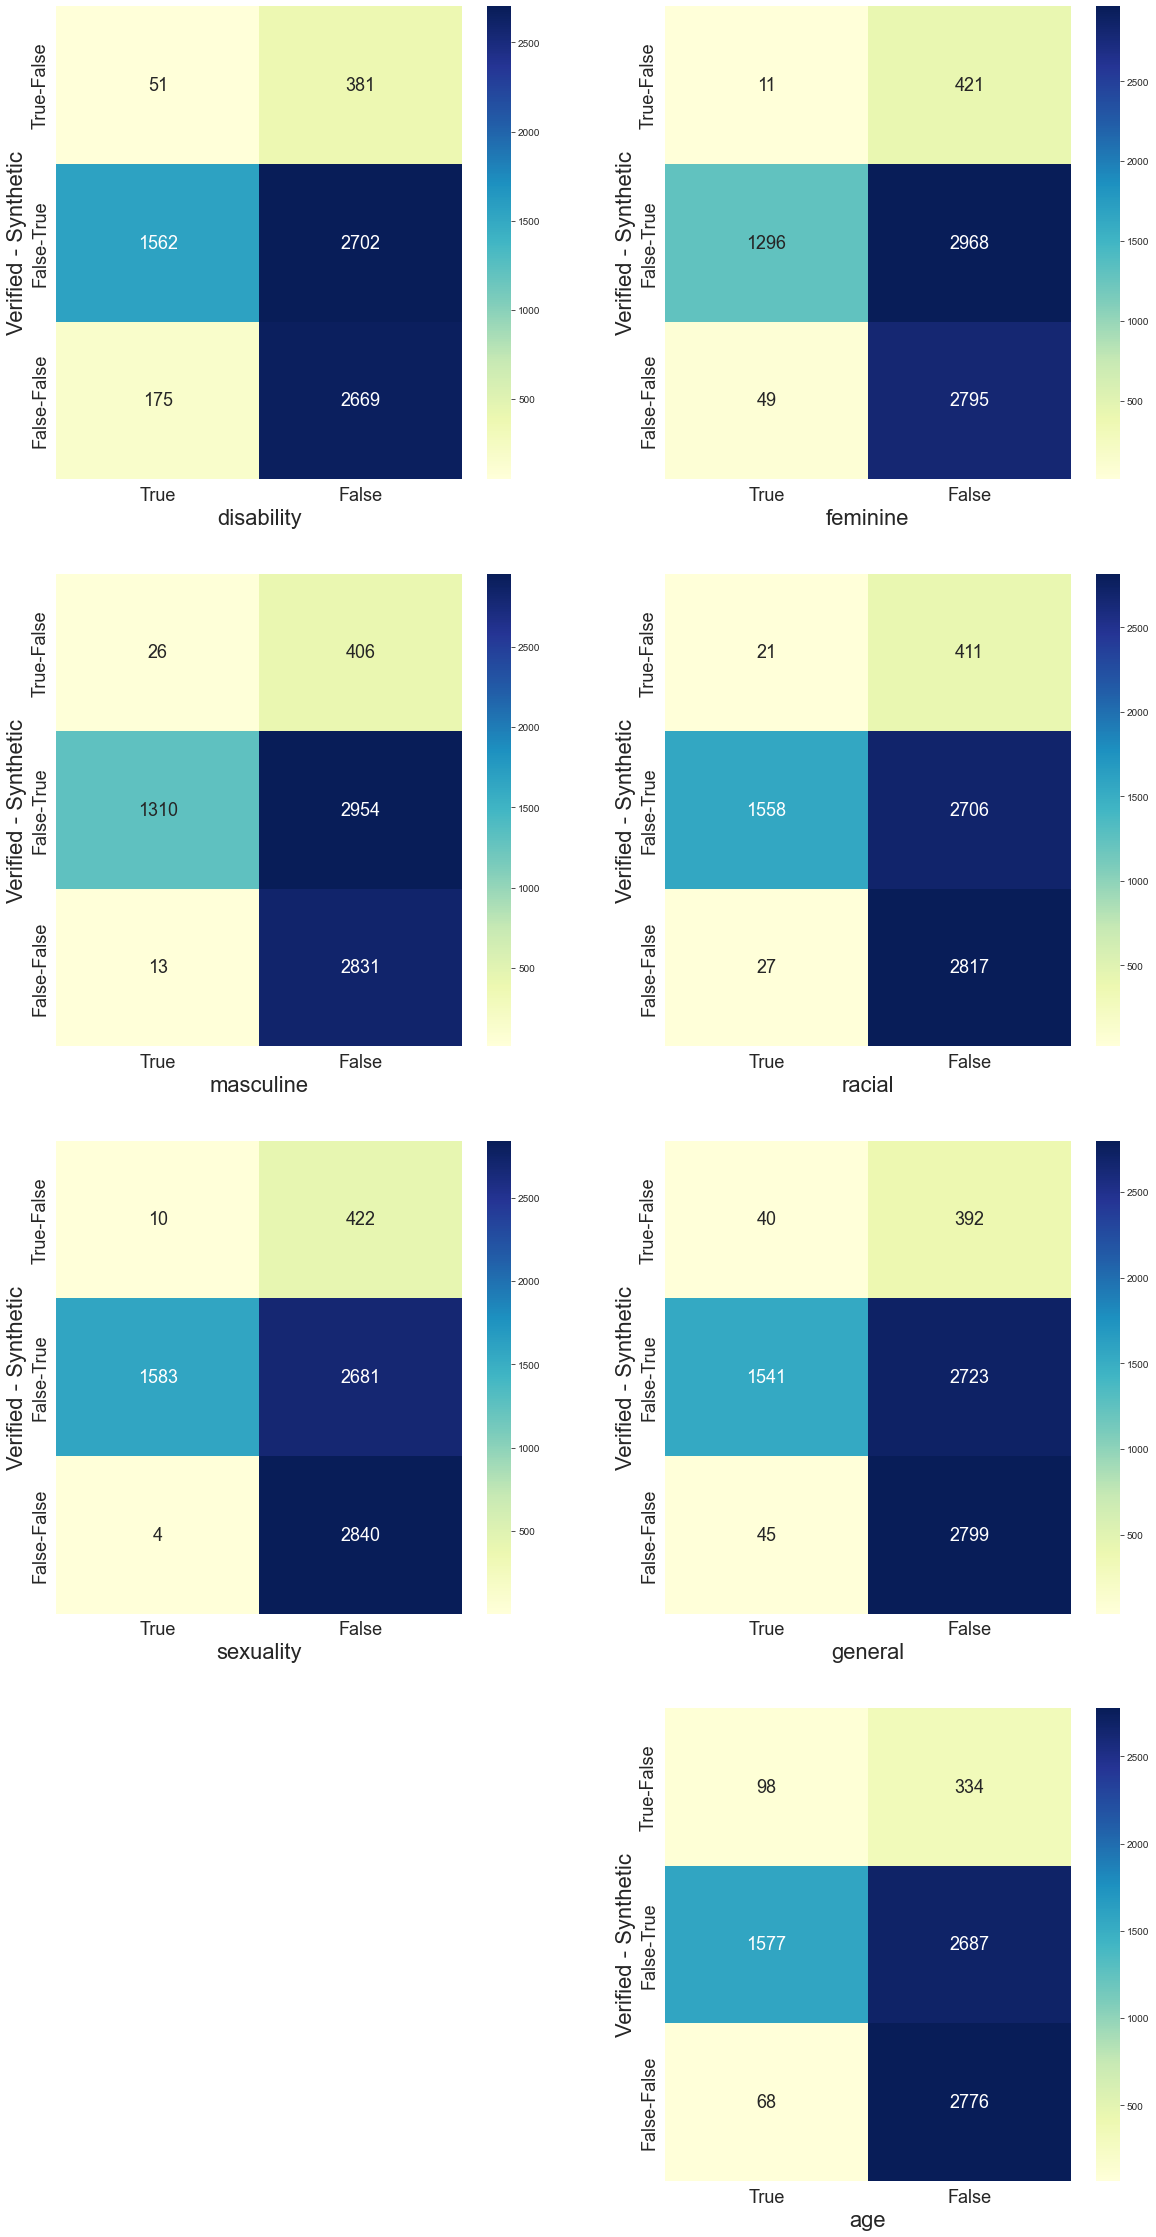

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns = 2

fig, axs = plt.subplots(nrows=4, ncols=columns, figsize=(20, 40))

i = 0
for category in categories:
    cross_tab = pd.crosstab(index=[df['verified'], df['synthetic']],
                            columns=df[f'label_{category}'])

    row_index = (i - 1) // columns
    col_index = (i - 1) % columns

    ax = axs[row_index, col_index]
    
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', ax=ax, annot_kws={"size": 18})
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    ax.set_xlabel(category, fontsize=22)
    ax.set_ylabel('Verified - Synthetic', fontsize=22)

    i = i + 1
    
# Remove the unused subplots
fig.delaxes(axs[3, 0])

#plt.tight_layout() 
plt.show()


# Bias Samples

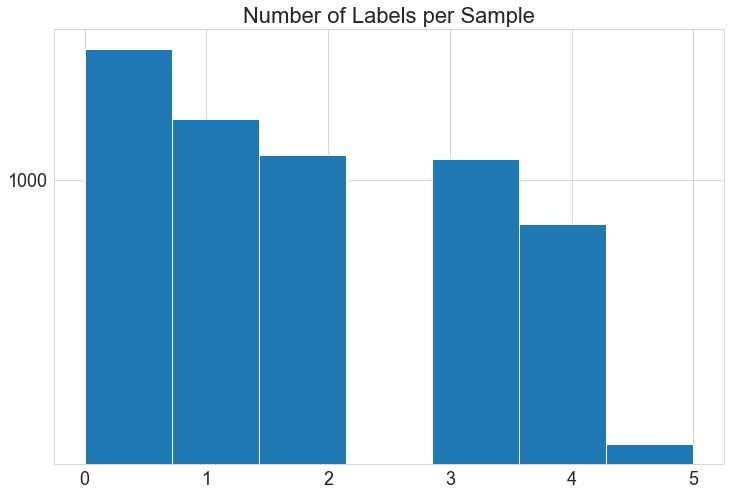

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 8))

ax = df[label_columns].sum(axis=1).plot.hist(log=True, bins=len(categories)  )
ax.get_yaxis().set_major_formatter(mtick.ScalarFormatter())
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

ax.set_xlabel('', fontsize=22)
ax.set_ylabel('', fontsize=22)
ax.set_title('Number of Labels per Sample', fontsize=22)

plt.show()

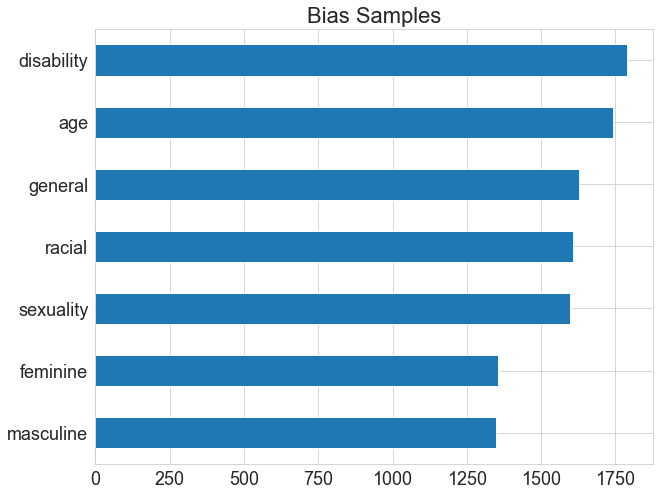

In [8]:
import matplotlib.pyplot as plt

counts = df[label_columns].sum()

# Remove the 'label_' prefix from the index
counts.index = counts.index.str.replace('label_', '')
counts = counts.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))  # Set the size of the figure
counts.plot(kind='barh', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlabel('', fontsize=22)
ax.set_ylabel('', fontsize=22)
ax.set_title('Bias Samples', size=22)
ax.set_xlim([0, None])

plt.gca().invert_yaxis()  # invert the y-axis to show the highest count at the top
plt.show()

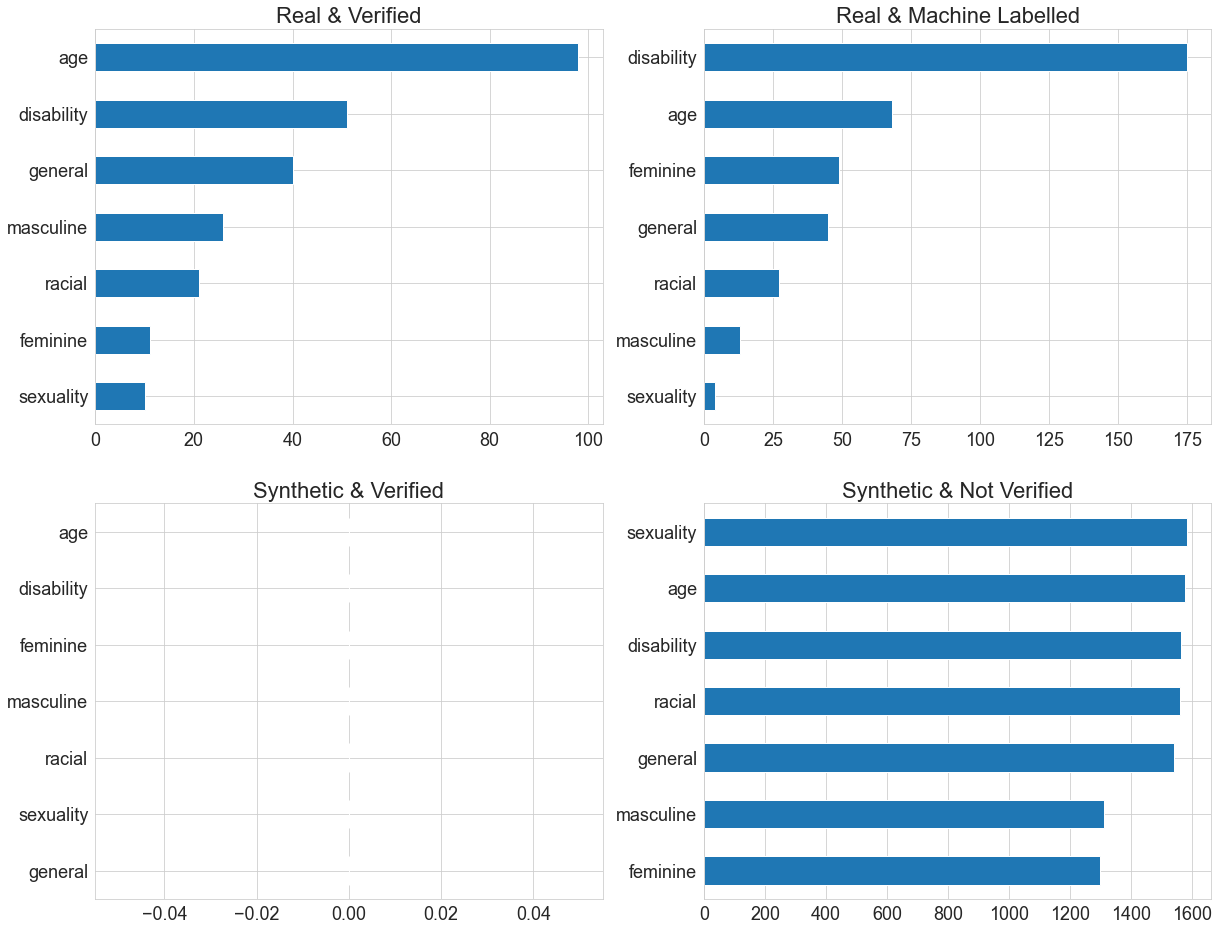

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

df_real_verified = df[~df['synthetic'] & df['verified']]
df_real_unverified = df[~df['synthetic'] & ~df['verified']]

df_synthetic_verified = df[df['synthetic'] & df['verified']]
df_synthetic_unverified = df[df['synthetic'] & ~df['verified']]

dfs = [df_real_verified, df_real_unverified, df_synthetic_verified, df_synthetic_unverified]
titles = ['Real & Verified', 'Real & Machine Labelled', 'Synthetic & Verified', 'Synthetic & Not Verified']

fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs = axs.ravel()  # Flatten array of axes


for i, df_sub in enumerate(dfs):
    counts = df_sub[label_columns].sum()
    counts.index = counts.index.str.replace('label_', '')
    counts = counts.sort_values(ascending=False)

    counts.plot(kind='barh', ax=axs[i])

    axs[i].tick_params(axis='both', which='major', labelsize=18)
    axs[i].tick_params(axis='both', which='minor', labelsize=18)
    axs[i].set_xlabel('', fontsize=22)
    axs[i].set_ylabel('', fontsize=22)

    axs[i].set_title(titles[i], size=22)
    axs[i].invert_yaxis()  # invert the y-axis
    #axs[i].set_xlim([0, 1000])

#plt.tight_layout()
plt.show()


# Label Diversity

High entropy indicates that the label distribution is fairly uniform, and no single label dominates.
This suggests a balanced dataset.

The maximum entropy occurs when all labels are equally probable.
The maximum entropy can be calculated using the formula: log_2(n)

In [10]:
df_real_verified = df[~df['synthetic'] & df['verified']]
df_real_unverified = df[~df['synthetic'] & ~df['verified']]

df_synthetic_verified = df[df['synthetic'] & df['verified']]
df_synthetic_unverified = df[df['synthetic'] & ~df['verified']]

diversity_df = [df, df_real_verified, df_real_unverified, df_synthetic_verified, df_synthetic_unverified]
diversity_captions = ['Full Dataset','Real & Verified', 'Real & Machine Labelled', 'Synthetic & Verified', 'Synthetic & Not Verified']

In [40]:
df[label_columns].sum()

label_age           1743
label_disability    1788
label_feminine      1356
label_masculine     1349
label_racial        1606
label_sexuality     1597
label_general       1626
dtype: int64

In [11]:
import numpy as np

# Calculate entropy for labels in dataset.
# Source: https://colab.research.google.com/drive/1pddMaJJIHR0O8MND42hfzYRxOPMV82KA?usp=sharing#scrollTo=RkVuiK_loty4

def categorical_entropy(df: pd.DataFrame, labels: list):
    # Calculate frequency for each label 
    label_frequency = df[labels].sum()

    # Calculate probabilities for each label
    label_probabilities = label_frequency / label_frequency.sum()

    # Calculate entropy
    entropy = -np.sum(label_probabilities * np.log2(label_probabilities))

    return entropy

In [12]:
import pandas as pd
import math

diversity_data = []

max_entropy = math.log2(len(categories))
max_entropy_data = {"Dataset": "Maximum Entropy Possible", "Entropy": max_entropy}
diversity_data.append(max_entropy_data)

for idx, sub_df in enumerate(diversity_df):
    caption = diversity_captions[idx]
    entropy = categorical_entropy(sub_df, label_columns)
    diversity_data.append({"Dataset": caption, "Entropy": entropy})

entropy_df = pd.DataFrame(diversity_data)
sorted_entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)
sorted_entropy_df.reset_index(drop=True, inplace=True)

sorted_entropy_df

,Dataset,Entropy
0,Maximum Entropy Possible,2.8074
1,Synthetic & Not Verified,2.8027
2,Full Dataset,2.8000
3,Real & Verified,2.4175
4,Real & Machine Labelled,2.2097
5,Synthetic & Verified,-0.0000


# Label Correlations

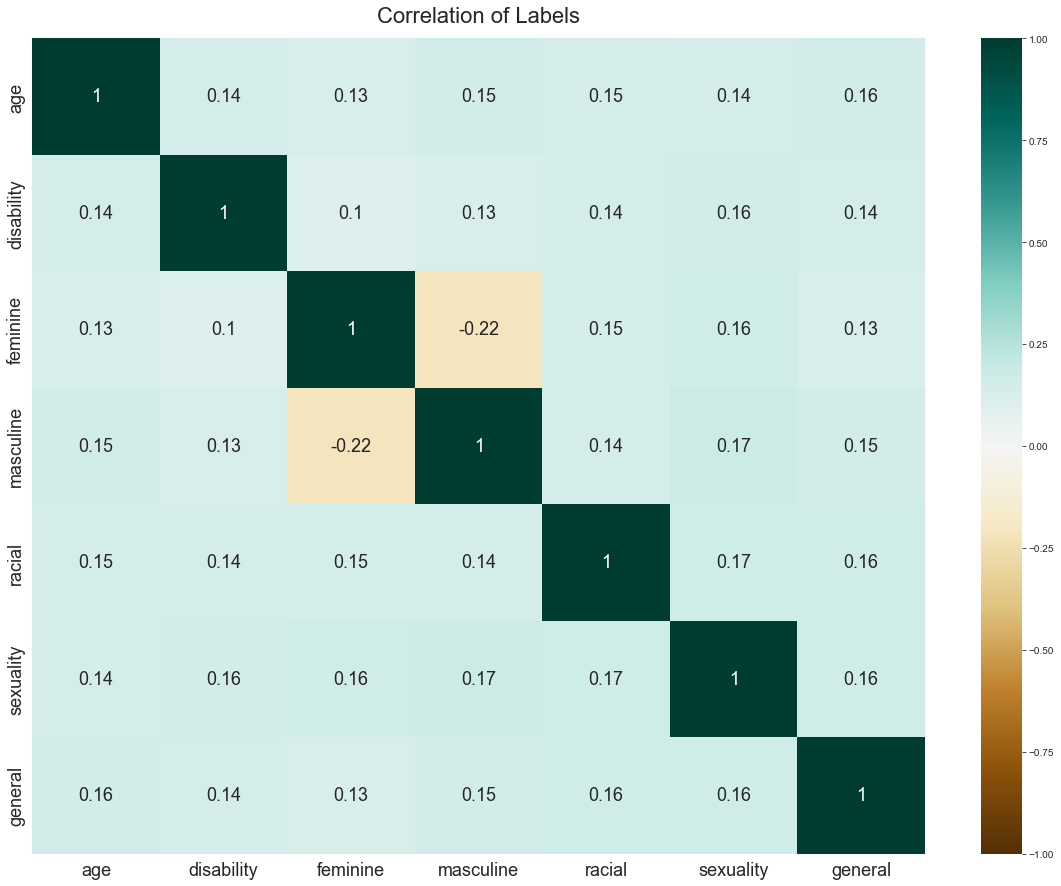

In [41]:
plt.figure(figsize=(20, 15))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

corr = df[label_columns].corr(method='pearson')

# Remove the 'label_' prefix from the index
corr.index = corr.index.str.replace('label_', '')
corr.columns = corr.columns.str.replace('label_', '')

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"fontsize": 18})
heatmap.set_title('Correlation of Labels', fontdict={'fontsize': 22}, pad=16);

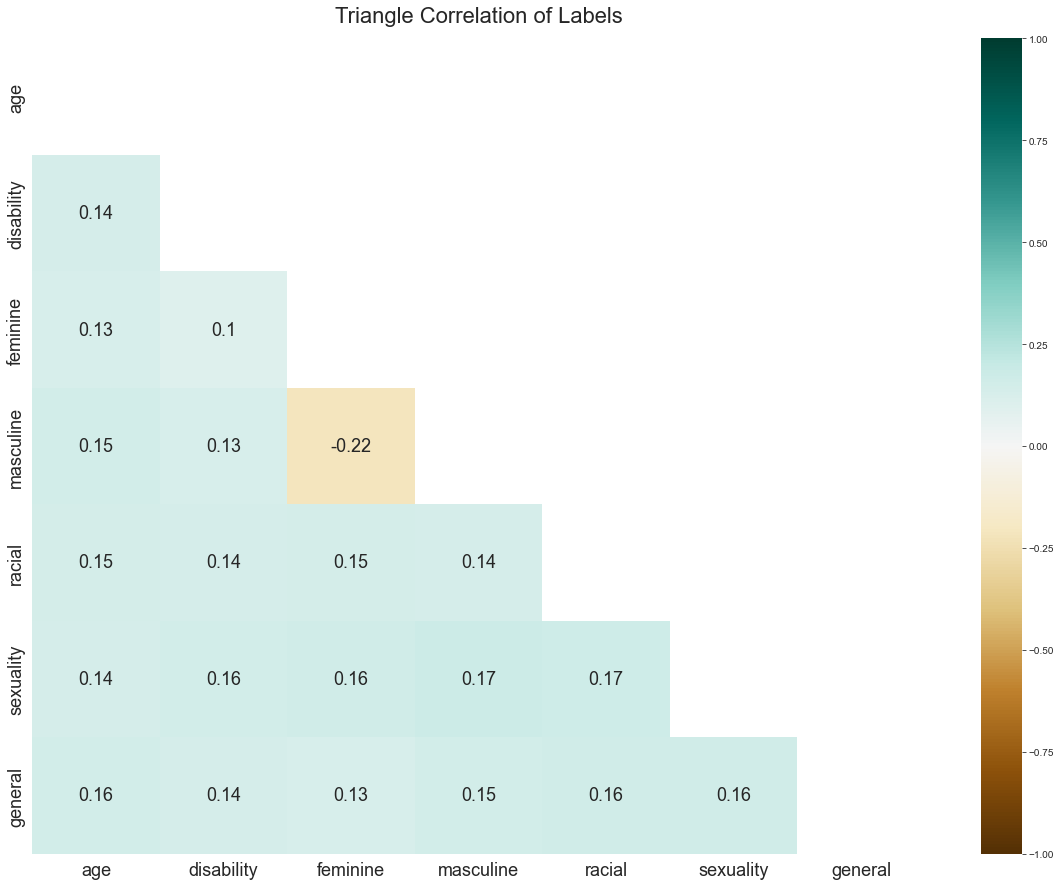

In [33]:
# Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(20, 15))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

corr = df[label_columns].corr(method ='pearson')

# Remove the 'label_' prefix from the index
corr.index = corr.index.str.replace('label_', '')
corr.columns = corr.columns.str.replace('label_', '')


mask = np.triu(np.ones_like(corr, dtype=np.bool_))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={"fontsize": 18})
heatmap.set_title('Triangle Correlation of Labels', fontdict={'fontsize':22}, pad=16);

# Countries

Country data is only available for real job postings, synthetic ones don't have one

In [14]:
print(f"Countries: {len(df['country'].unique())}")

Countries: 78


In [15]:
df['country'].value_counts()

country
RU    328
US    280
UA    279
KZ    273
UK    167
     ... 
GE      4
GT      3
VE      1
BO      1
EC      1
Name: count, Length: 77, dtype: int64

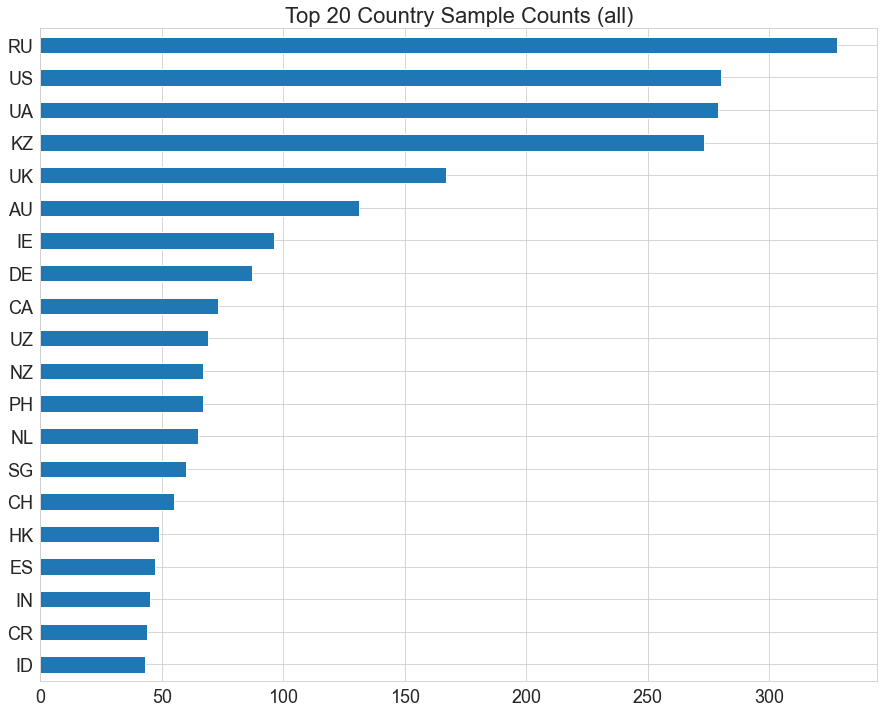

In [34]:
import matplotlib.pyplot as plt

n = 20

counts = df['country'].value_counts().sort_values(ascending=True).tail(n)

fig, ax = plt.subplots(figsize=(15, 12))
counts.plot(kind='barh', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlabel('', fontsize=22)
ax.set_ylabel('', fontsize=22)
ax.set_title(f'Top {n} Country Sample Counts (all)', size=22)
ax.invert_yaxis()
ax.set_xlim([0, None])
plt.gca().invert_yaxis()

plt.show()

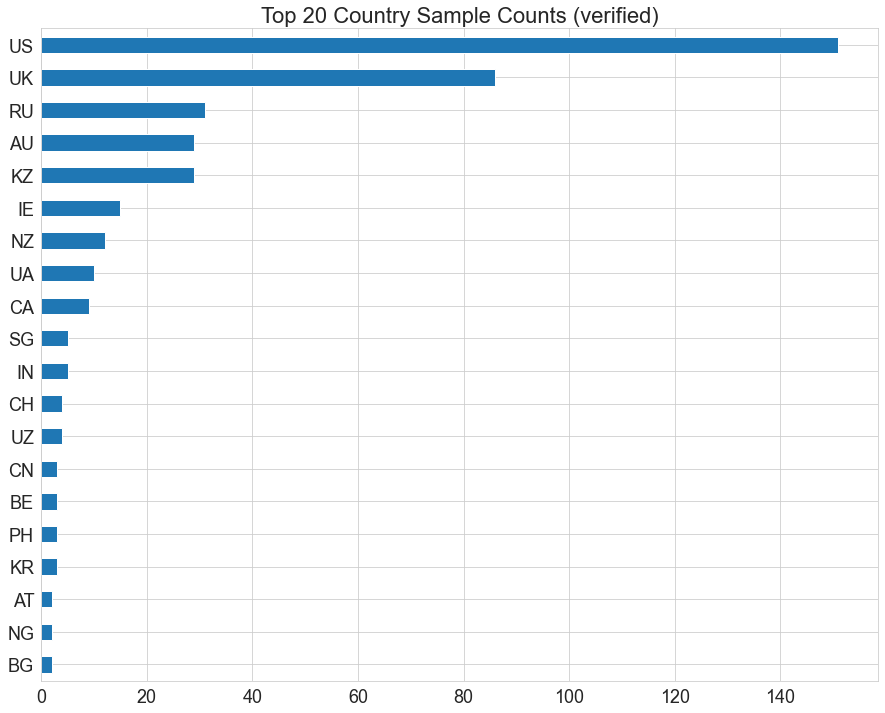

In [35]:
import matplotlib.pyplot as plt

n = 20

counts = df[df['verified'] == True]['country'].value_counts().sort_values(ascending=True).tail(n)

fig, ax = plt.subplots(figsize=(15, 12))
counts.plot(kind='barh', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlabel('', fontsize=22)
ax.set_ylabel('', fontsize=22)
ax.set_title(f'Top {n} Country Sample Counts (verified)', size=22)
ax.invert_yaxis()
ax.set_xlim([0, None])
plt.gca().invert_yaxis()

plt.show()

# Website Sources

Only real job postings have website sources

In [18]:
print(f"Website Sources: {len(df['source'].unique())}")

Website Sources: 144


In [19]:
df['source'].value_counts()

source
headhunter_ru       326
headhunter_kz       273
headhunter_ua       249
seek_au             130
careerbuilder_us     93
                   ... 
eures_fi              1
linkedin_bo           1
linkedin_ec           1
monster2_at           1
linkedin_ve           1
Name: count, Length: 143, dtype: int64

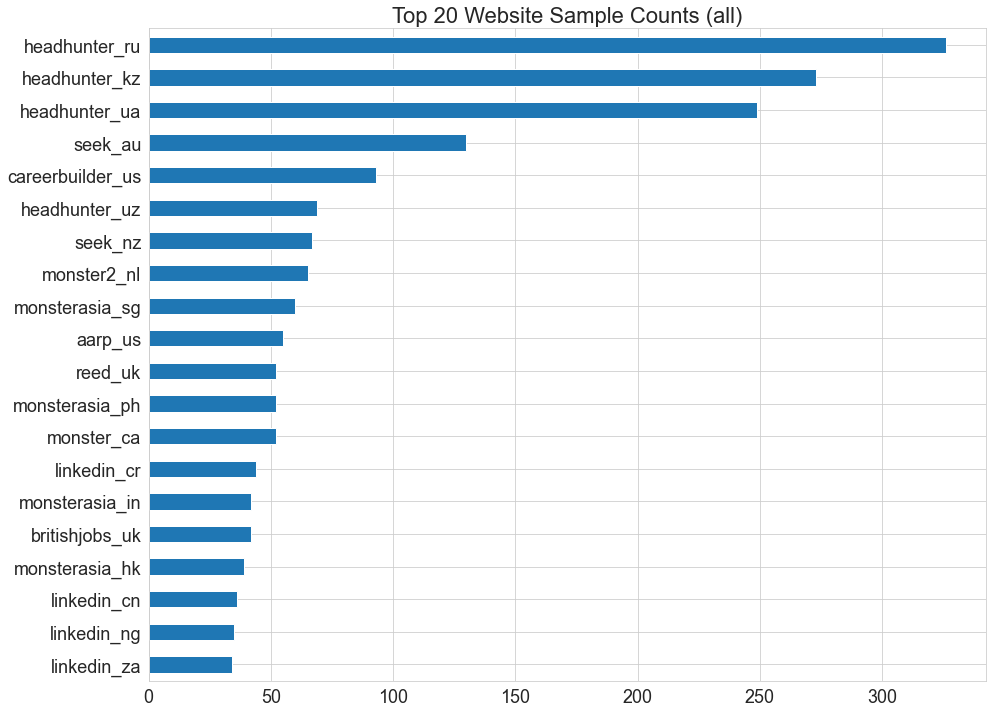

In [36]:
import matplotlib.pyplot as plt

n = 20

counts = df['source'].value_counts().sort_values(ascending=True).tail(n)

fig, ax = plt.subplots(figsize=(15, 12))
counts.plot(kind='barh', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlabel('', fontsize=22)
ax.set_ylabel('', fontsize=22)
ax.set_title(f'Top {n} Website Sample Counts (all)', size=22)
ax.invert_yaxis()
ax.set_xlim([0, None])
plt.gca().invert_yaxis()

plt.show()

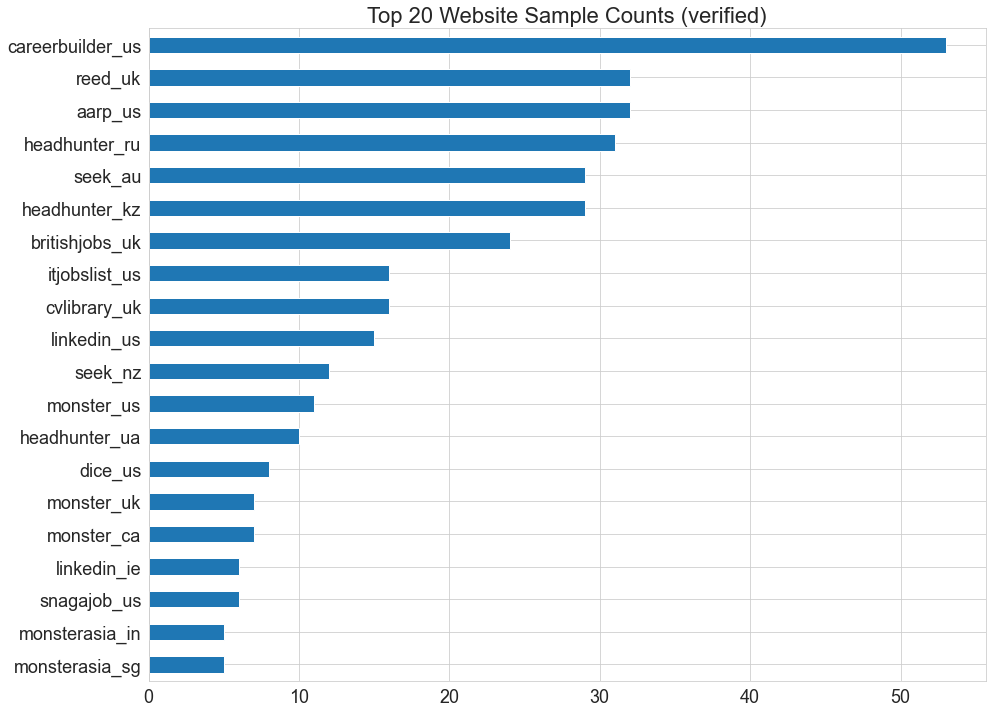

In [37]:
import matplotlib.pyplot as plt

n = 20

counts = df[df['verified'] == True]['source'].value_counts().sort_values(ascending=True).tail(n)

fig, ax = plt.subplots(figsize=(15, 12))
counts.plot(kind='barh', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlabel('', fontsize=22)
ax.set_ylabel('', fontsize=22)
ax.set_title(f'Top {n} Website Sample Counts (verified)', size=22)
ax.invert_yaxis()
ax.set_xlim([0, None])
plt.gca().invert_yaxis()

plt.show()

# Companies and Job Titles

Only real job postings have companies, synthetics do have job titles

In [22]:
print(f"Companies: {len(df['company'].unique())}")
print(f"Job Titles: {len(df['position'].unique())}")

Companies: 2106
Job Titles: 4247


# Longest Text

Use different tokenisers to estimate the number of tokens

In [23]:

from transformers import AutoTokenizer


def print_max_tokens(model_id):
    tokenizer = AutoTokenizer.from_pretrained(model_id, add_prefix_space=True)
    max_tokens = len(tokenizer.encode(longest_text))
    print(f"Max '{model_id}' tokens: {max_tokens}")


def print_encode_decoded(model_id, longest_text):
    tokenizer = AutoTokenizer.from_pretrained(model_id, add_prefix_space=True)
    encoded_tokens = tokenizer.encode(longest_text)
    print(f"Tokens: {encoded_tokens}")
    print(f"Decoded tokens: {tokenizer.decode(encoded_tokens)}")


def print_tokens(model_id, longest_text):
    tokenizer = AutoTokenizer.from_pretrained(model_id, add_prefix_space=True)
    tokens = tokenizer.tokenize(longest_text)
    print(f"Tokens: {tokens}")


In [24]:
df[text_column].fillna('', inplace=True)
longest_text = df[text_column].apply(lambda x: (len(x), x)).max()[1]

max_char = len(longest_text)
max_words = len(longest_text.split())

print(f'Max characters: {max_char}')
print(f'Max words: {max_words}')
for model_id in ['roberta-base', 'bert-base-uncased', 'microsoft/deberta-v3-small']:
    print_max_tokens(model_id)


/tmp/ipykernel_577460/1157509274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[text_column].fillna('', inplace=True)


Max characters: 3088
Max words: 412


Token indices sequence length is longer than the specified maximum sequence length for this model (523 > 512). Running this sequence through the model will result in indexing errors


Max 'roberta-base' tokens: 523
Max 'bert-base-uncased' tokens: 506
Max 'microsoft/deberta-v3-small' tokens: 499


/home/teveritt/.local/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Explore what the tokens look like (in roberta)

In [25]:
print_tokens('roberta-base', longest_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (521 > 512). Running this sequence through the model will result in indexing errors


Tokens: ['ĠConsumer', ',', 'ĠBusiness', 'Ġand', 'ĠDigital', 'ĠBanking', 'ĠâĢĵ', 'ĠWe', 'Ġwork', 'Ġwith', 'Ġour', 'Ġretail', 'Ġbanking', ',', 'Ġbusiness', 'Ġbanking', ',', 'Ġconsumer', 'Ġlending', ',', 'Ġmortgage', 'Ġand', 'Ġdigital', 'Ġbanking', 'Ġbusinesses', 'Ġto', 'Ġdefine', 'Ġfar', 'Ġreaching', 'Ġtechnology', 'Ġstrategies', 'Ġto', 'Ġevolve', 'Ġour', 'Ġcustomer', 'Ġexperiences', ',', 'Ġto', 'Ġmake', 'Ġus', 'Ġeasier', 'Ġto', 'Ġdo', 'Ġbusiness', 'Ġwith', 'Ġand', 'Ġto', 'Ġdeliver', 'Ġsolutions', 'Ġthat', 'Ġprovide', 'Ġreal', 'Ġvalue', '.', 'ĠThis', 'Ġincludes', 'Ġall', 'Ġcore', 'Ġconsumer', 'Ġdeposit', ',', 'Ġloan', 'Ġand', 'Ġpayment', 'Ġprocessing', 'Ġand', 'Ġservicing', 'Ġplatforms', '.', 'ĠAll', 'Ġcore', 'Ġchannel', 'Ġsystems', 'Ġfor', 'Ġretail', 'Ġbranches', ',', 'ĠAT', 'Ms', 'Ġand', 'Ġcall', 'Ġcenters', '.', 'ĠCustom', 'Ġbuilt', 'Ġonline', 'Ġand', 'Ġmobile', 'Ġbanking', 'Ġplatforms', '.', 'ĠAnd', 'Ġmt', 'b', '.', 'Ġcom', 'Ġand', 'Ġmarketing', 'Ġecosystem', 'Ġcapabilities', '.', 'Ġ

In [26]:
longest_text

'Consumer, Business and Digital Banking – We work with our retail banking, business banking, consumer lending, mortgage and digital banking businesses to define far reaching technology strategies to evolve our customer experiences, to make us easier to do business with and to deliver solutions that provide real value. This includes all core consumer deposit, loan and payment processing and servicing platforms. All core channel systems for retail branches, ATMs and call centers. Custom built online and mobile banking platforms. And mtb. com and marketing ecosystem capabilities. Overview: Manages the activities of several Technology Team Leaders or units and responsible for each Team’s/unit’s development and systems support efforts. Provides day-to-day direction for the units and applications in line with goals of department and the clients they support. Responsible for managing client relations and expectations. Manages the project queue for their area. Strives to achieve individual and

In [27]:
print_encode_decoded('roberta-base', longest_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (523 > 512). Running this sequence through the model will result in indexing errors


Tokens: [0, 7653, 6, 2090, 8, 6282, 12539, 126, 166, 173, 19, 84, 2304, 3454, 6, 265, 3454, 6, 2267, 6946, 6, 5501, 8, 1778, 3454, 1252, 7, 9914, 444, 3970, 806, 4964, 7, 14842, 84, 2111, 3734, 6, 7, 146, 201, 3013, 7, 109, 265, 19, 8, 7, 2438, 2643, 14, 694, 588, 923, 4, 152, 1171, 70, 2731, 2267, 8068, 6, 2541, 8, 3207, 5774, 8, 21529, 4818, 4, 404, 2731, 4238, 1743, 13, 2304, 9836, 6, 3263, 13123, 8, 486, 5228, 4, 16583, 1490, 804, 8, 1830, 3454, 4818, 4, 178, 41601, 428, 4, 3137, 8, 2474, 10764, 5587, 4, 15184, 35, 1554, 3443, 5, 1713, 9, 484, 3777, 2711, 16029, 50, 2833, 8, 2149, 13, 349, 2711, 17, 27, 29, 73, 19304, 17, 27, 29, 709, 8, 1743, 323, 1170, 4, 42681, 183, 12, 560, 12, 1208, 2698, 13, 5, 2833, 8, 2975, 11, 516, 19, 1175, 9, 1494, 8, 5, 2539, 51, 323, 4, 25714, 4748, 13, 4196, 3653, 3115, 8, 2113, 4, 1554, 3443, 5, 695, 21021, 13, 49, 443, 4, 21836, 3677, 7, 3042, 1736, 8, 20973, 10366, 23, 3527, 701, 4, 11518, 25714, 38935, 35, 1554, 1580, 8, 4064, 11, 12777, 29, 19, 3

2024-06-20 09:45:27.586962: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 09:45:27.611569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Decoded tokens: <s> Consumer, Business and Digital Banking – We work with our retail banking, business banking, consumer lending, mortgage and digital banking businesses to define far reaching technology strategies to evolve our customer experiences, to make us easier to do business with and to deliver solutions that provide real value. This includes all core consumer deposit, loan and payment processing and servicing platforms. All core channel systems for retail branches, ATMs and call centers. Custom built online and mobile banking platforms. And mtb. com and marketing ecosystem capabilities. Overview: Manages the activities of several Technology Team Leaders or units and responsible for each Team’s/unit’s development and systems support efforts. Provides day-to-day direction for the units and applications in line with goals of department and the clients they support. Responsible for managing client relations and expectations. Manages the project queue for their area. Strives to ach